In [1]:
import timeit
import numpy as np
import git
import matplotlib.pyplot as plt
import importlib
import sys
import os


In [2]:
repo = git.Repo("speckle-test/")

In [3]:
start_commit = {"hash": "34e3f5af8d9cd5bd65dd32fad1b6f900101e058f", "name": "start"}
commit_np = {"hash": "09a1e5772a7ede4b67b47ea4fcea1dc4f01805b6", "name": "Vectorised numpy"}

In [4]:
# Set the relative path to the directory containing the module
module_dir = os.path.join(os.getcwd(), 'speckle-test', 'src', 'speckle')

# Add the module directory to sys.path
sys.path.append(module_dir)

from speckle import speckle

In [5]:
repo.git.checkout(commit_np['hash'])

importlib.reload(sys.modules[speckle.__module__])

<module 'speckle' from '/home/john/Large/john/Programs/speckle-testing/speckle-test/src/speckle/speckle.py'>

In [12]:
def test_image_size(sizes = [10, 1e2, 1e3, 1e4], repeats=1):
	sizes = [10, 1e2, 1e3, 1e4]

	# generate them into function arguments
	argument_sets = []
	for s in sizes:
		argument_sets.append((int(s), int(s)))

	time_results = []
	for args in argument_sets:
		statement = f"speckle(*{args})"

		# statement = "speckle(image_width = int(s), image_height = int(s))"
		t = timeit.repeat(stmt=statement, setup="from speckle import speckle", number=repeats, repeat=3)
		time_results.append(t)
	return time_results

In [13]:
# the commits we are testing
commits = [start_commit, commit_np]

In [14]:
# time the different commits and record it
timings = []

sizes = [10, 1e2, 1e3, 1e4]

for c in commits:
	repo.git.checkout(c['hash'])
	importlib.reload(sys.modules[speckle.__module__])

	time_results = test_image_size(sizes=sizes, repeats=5)
	timings.append(time_results)


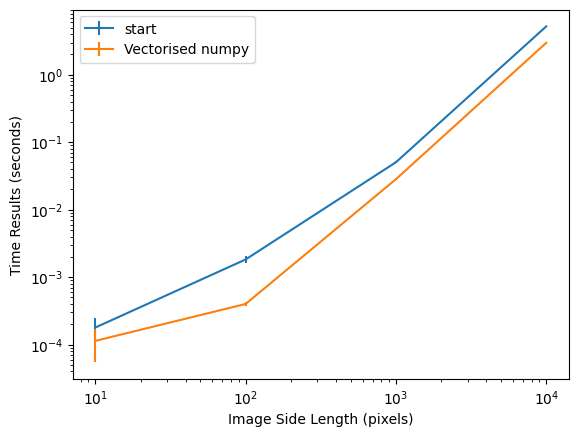

In [43]:
means = np.mean(timings, axis=2)
std = np.std(timings, axis=2)

for i in range(means.shape[0]):
	plt.errorbar(sizes, y=means[i], yerr=std[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Image Side Length (pixels)')
plt.ylabel('Time Results (seconds)')
plt.legend([c['name'] for c in commits])
plt.show()